In [2]:
import IPython.core.display
import matplotlib

def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("data/vgsales.csv")
# df.value.astype(int, copy=False);

In [19]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.Developer.count()

10096

In [4]:
df.Name.isnull()
df = df[df['Name'].notna()]

In [5]:
df.User_Score.isnull().sum()

6702

In [6]:
#non-numeric value convert to NaN
df['User_Score'] = df['User_Score'].apply(pd.to_numeric, errors='coerce')
df['Rating'] = df['Rating'].apply(pd.to_numeric, errors='coerce')

In [7]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating             float64
dtype: object

In [8]:
df[['Publisher', 'Developer']]=df[['Publisher', 'Developer']].fillna(value='missing')

In [26]:
# df['Rating'] = df['Rating'].astype('Int64')


In [9]:
df[['Critic_Count', 'Critic_Score', 'User_Count']] = df[['Critic_Count', 'Critic_Score', 'User_Count']].astype('Int64')

In [10]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score         Int64
Critic_Count         Int64
User_Score         float64
User_Count           Int64
Developer           object
Rating             float64
dtype: object

In [22]:
#object to Category
df['Genre']= df['Genre'].astype('category')
genres = df.Genre.cat.categories
print(genres)

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object')


Text(0.5, 1.0, 'Total Counts by Genres')

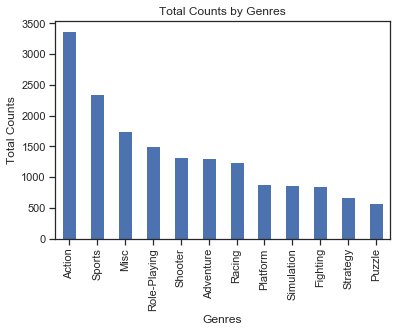

In [44]:
df['Genre'].value_counts().plot(kind='bar')
plt.xlabel("Genres");
plt.ylabel('Total Counts')
plt.title('Total Counts by Genres')

Text(0.5, 1.0, 'Critic Score by Genres')

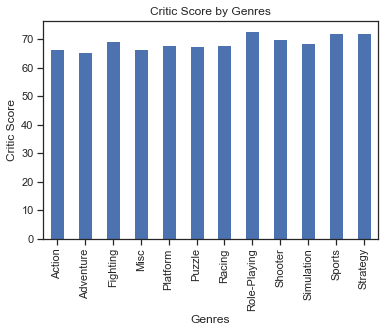

In [45]:
df.groupby('Genre')['Critic_Score'].mean().plot(kind='bar')
plt.xlabel("Genres");
plt.ylabel('Critic Score')
plt.title('Critic Score by Genres')
#plot by score
#in terms of rating from critic and users there is not that much of a difference
#role playing games has slightly hier ratings from both critics and users;


Text(0.5, 1.0, 'Users Score by Genres')

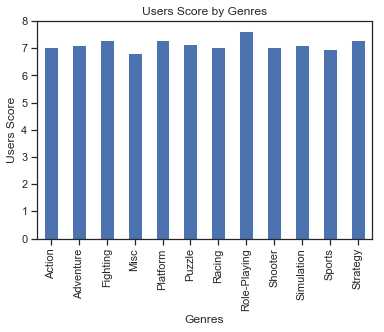

In [46]:
df.groupby('Genre')['User_Score'].mean().plot(kind='bar')
plt.xlabel("Genres");
plt.ylabel('Users Score')
plt.title('Users Score by Genres')

Text(0.5, 1.0, 'Global Sales by Genres')

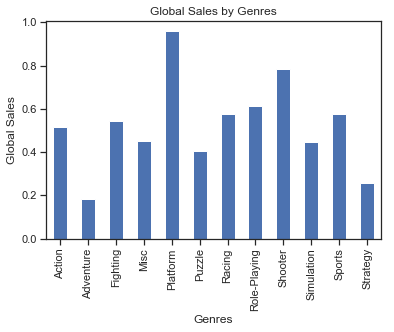

In [47]:
df.groupby('Genre')['Global_Sales'].mean().plot(kind='bar')
plt.xlabel("Genres");
plt.ylabel('Global Sales')
plt.title('Global Sales by Genres')
#plot by sale
#platform game significantly has a higher sale

Text(0.5, 1.0, 'North America Sales by Genres')

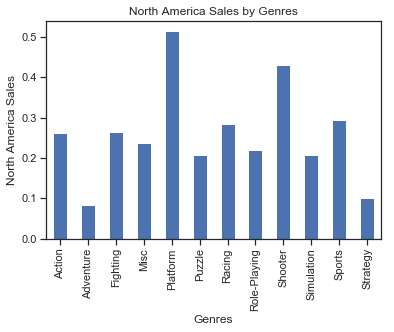

In [48]:
df.groupby('Genre')['NA_Sales'].mean().plot(kind='bar')
plt.xlabel("Genres");
plt.ylabel('North America Sales')
plt.title('North America Sales by Genres')

Text(0.5, 1.0, 'EU sales by genres')

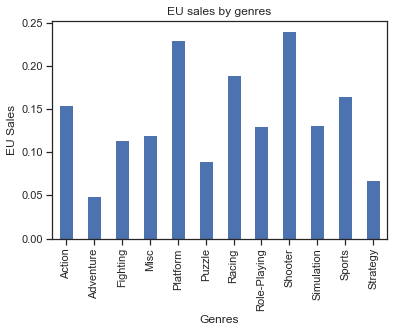

In [49]:
df.groupby('Genre')['EU_Sales'].mean().plot(kind='bar')
plt.xlabel("Genres");
plt.ylabel('EU Sales')
plt.title('EU sales by genres')
#this is not the case for EU, it is shooter with highest sale and Platform games just a bit lower

Text(0.5, 1.0, 'Japan Sales by Genres')

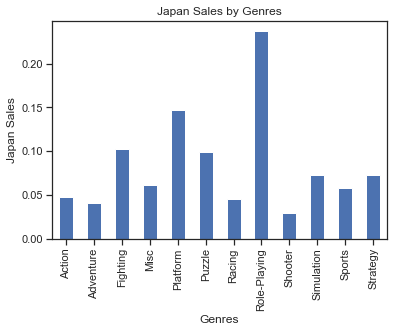

In [50]:
df.groupby('Genre')['JP_Sales'].mean().plot(kind='bar')
plt.xlabel("Genres");
plt.ylabel('Japan Sales')
plt.title('Japan Sales by Genres')
#in Japan Role-Playing games significantly has a higher sale

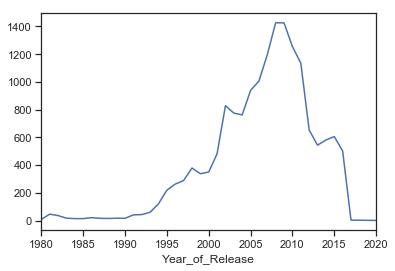

In [51]:
df.groupby('Year_of_Release')['Platform'].count().plot()

In [52]:
df.groupby('Year_of_Release','Platform').sum().plot()

ValueError: No axis named Platform for object type <class 'type'>

In [ ]:
df.Year_of_Release.value_counts()
# df.shape

In [ ]:
df.groupby('Year_of_Release')['Platform'].plot()

In [ ]:
df.loc[0]

In [ ]:
df.describe()